**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from datetime import datetime

LOADING THE DATA:

In [3]:
df = pd.read_csv('/content/btc_15m_data_2018_to_2025.csv')
print(df.head())
print(df.tail())
print(df.info())

               Date      Open      High       Low     Close      Volume  \
0  01-01-2018 00:00  13715.65  13715.65  13400.01  13556.15  123.616013   
1  01-01-2018 00:15  13533.75  13550.87  13402.00  13521.12   98.136430   
2  01-01-2018 00:30  13500.00  13545.37  13450.00  13470.41   79.904037   
3  01-01-2018 00:45  13494.65  13690.87  13450.00  13529.01  141.699719   
4  01-01-2018 01:00  13528.99  13571.74  13402.28  13445.63   72.537533   

  Close time  Quote asset volume  Number of trades  \
0    15:00.0        1.675545e+06              1572   
1    30:00.0        1.321757e+06              1461   
2    45:00.0        1.078825e+06              1000   
3    00:00.0        1.917783e+06              1195   
4    15:00.0        9.778198e+05               898   

   Taker buy base asset volume  Taker buy quote asset volume  Ignore  
0                    63.227133                  8.576108e+05     0.0  
1                    47.686389                  6.422812e+05     0.0  
2          

DATA CLEANING

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', errors='coerce')


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek


df = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])



In [5]:
df_model = df[['Date', 'Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Day', 'DayOfWeek']].dropna()

MODEL CREATION:

Input and Output features:

In [6]:
X = df[['Year', 'Month', 'Day', 'DayOfWeek']]
y = df['Close']

TRAIN_TEST SPLIT:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST REGRESSOR:

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION:

In [9]:
y_pred = model.predict(X_test)
print("R² Score: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score:  0.98627394118984
RMSE:  286.9212945675344


Make Prediction for Custom Input:

In [11]:
input_data = pd.DataFrame([{
    'Year': 2025,
    'Month': 4,
    'Day': 20,
    'DayOfWeek': pd.Timestamp("2025-04-17").dayofweek
}])
predicted_price = model.predict(input_data)[0]
print(f"📅 Predicted Bitcoin Price on 2025-04-25: ${predicted_price:.2f}")

📅 Predicted Bitcoin Price on 2025-04-25: $7820.90


**HISTORICAL GRAPH**

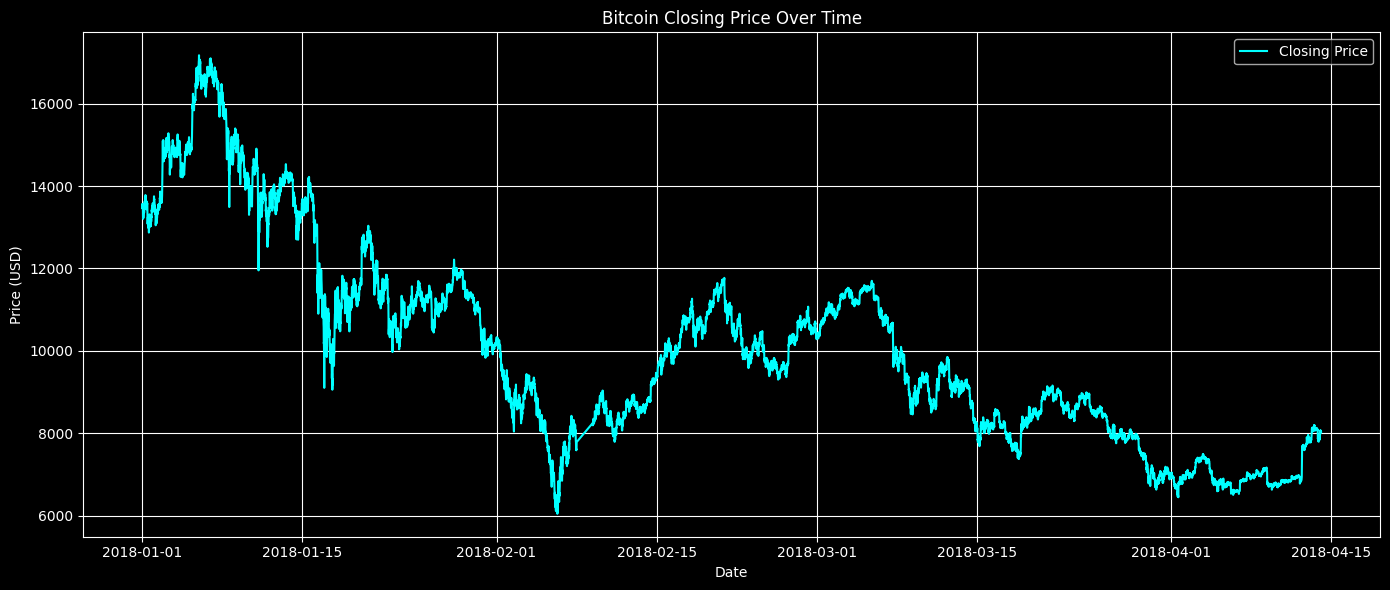

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='cyan', label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**FUTURE PREDICTION GRAPH**

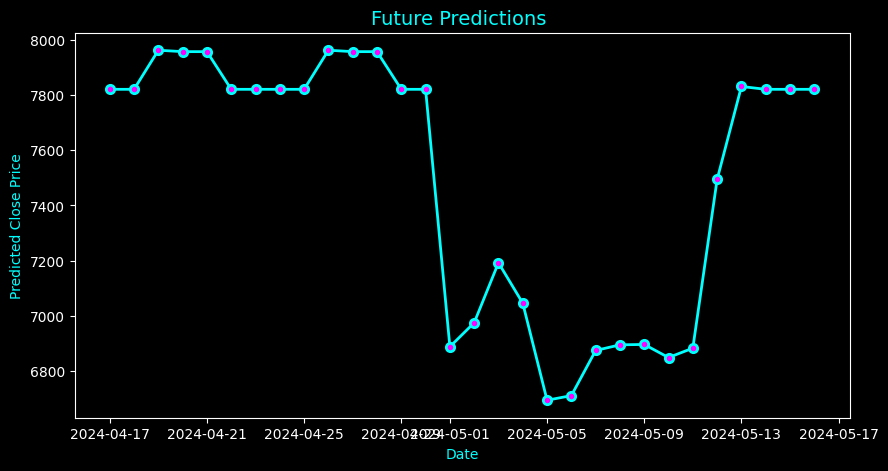

In [13]:
# EXAMPLE:
year = 2024
month = 4
day = 17
future_dates = pd.date_range(start=pd.Timestamp(year=year, month=month, day=day), periods=30)
future_features = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'DayOfWeek': future_dates.dayofweek
})
predictions = model.predict(future_features)
# 1. Future Predictions Graph
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
plt.plot(future_dates, predictions, marker='o', color='cyan', linewidth=2, markerfacecolor = 'magenta', markeredgewidth=2)
plt.title("Future Predictions ", color='cyan', fontsize=14)
plt.xlabel("Date", color='cyan')
plt.ylabel("Predicted Close Price", color='cyan')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

**HEATMAP**

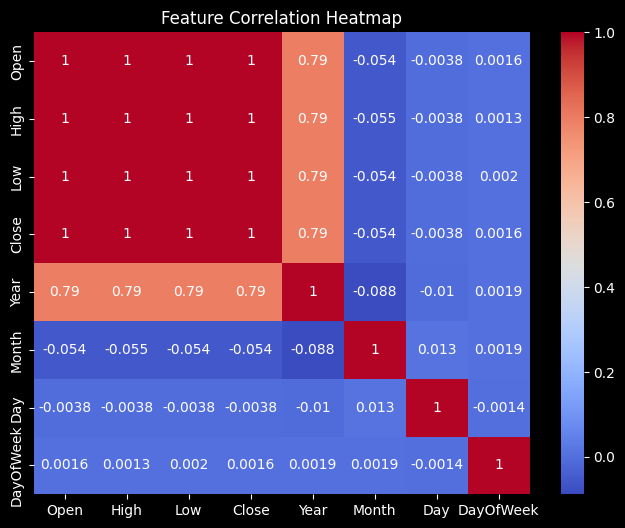

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Day', 'DayOfWeek']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-39-809705bb6bc0>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x=df['DayOfWeek'], y=df['Close'], palette='coolwarm')


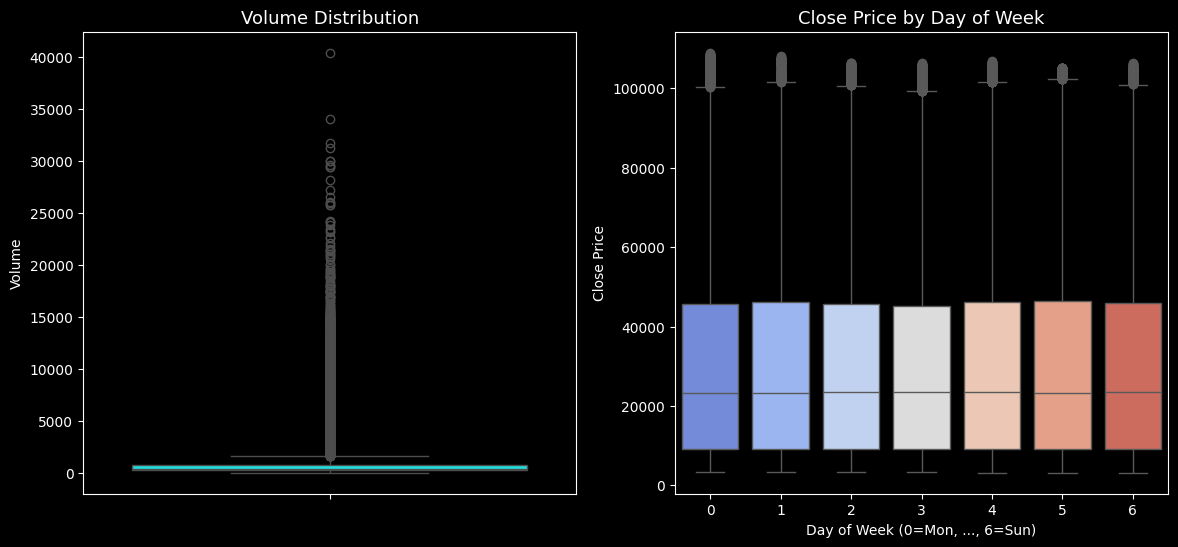

In [ ]:
df = pd.read_csv("/content/btc_15m_data_2018_to_2025.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df = df.dropna(subset=['Date', 'Open', 'High', 'Low', 'Close'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

plt.style.use('dark_background')
fig, axes = plt.subplots(1, 2, figsize=(14,6))

if 'Volume' in df.columns:
    sns.boxplot(ax= axes[0], y = df['Volume'], color='cyan')
    axes[0].set_title('Volume Distribution', fontsize=13, color='white')
    axes[0].set_ylabel("Volume")

else:
    axes[0].text(0.5, 0.5, "no volume data found")
    axes[0].set_axis_off()
if 'Close' in df.columns:
    sns.boxplot(ax=axes[1], x=df['DayOfWeek'], y=df['Close'], palette='coolwarm')
    axes[1].set_title('Close Price by Day of Week', fontsize=13, color='white')
    axes[1].set_xlabel("Day of Week (0=Mon, ..., 6=Sun)")
    axes[1].set_ylabel("Close Price")